In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys

In [3]:
Inter_Dist = np.loadtxt("../../out/APS_TOTAL/00/Interevent_DIST.dat")
Inter_Avg = np.loadtxt("../../out/APS_TOTAL/00/Interevent_AVG.dat")

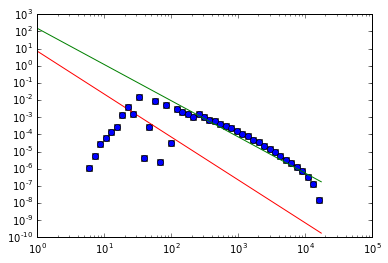

In [8]:
TOT_Bins = np.logspace(.0, np.log10(Inter_Dist[-1,0]), np.log(Inter_Dist[-1,0])/np.log(1.2))
TOT_F, TOT_Bins = np.histogram(Inter_Dist[:,0], weights=Inter_Dist[:,1], bins=TOT_Bins, density=True)

CLR_Bins = np.logspace(.0, np.log10(Inter_Dist[-1,0]), np.log(Inter_Dist[-1,0])/np.log(1.2))
CLR_F, CLR_Bins = np.histogram(Inter_Dist[:,0], weights=Inter_Dist[:,2], bins=CLR_Bins, density=True)

plt.loglog((TOT_Bins[1:]+TOT_Bins[:-1])/2., TOT_F, 'sk')
plt.loglog(TOT_Bins, 7*TOT_Bins**-2.499, '-r')

plt.loglog((CLR_Bins[1:]+CLR_Bins[:-1])/2., CLR_F, 'ob')
plt.loglog(CLR_Bins, 150.*CLR_Bins**-2.1075, '-g')

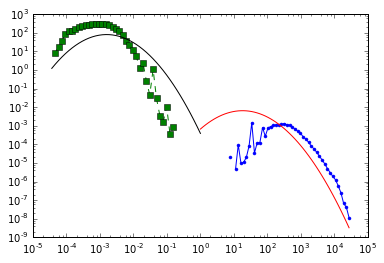

In [12]:
#plt.loglog(sorted(Inter_Avg[:,0], reverse=True), '-r')
#plt.loglog(sorted(Inter_Avg[:,1], reverse=True), '--k')

b = np.logspace(.0, np.log10(Inter_Avg[:,0].max()),\
            np.log(Inter_Avg[:,0].max())/np.log(1.2))

f,b = np.histogram(Inter_Avg[:,0], bins=b, density=True)

plt.loglog(b[1:], f, '.-')
plt.loglog(b[:], .3/b[:]*np.exp(-(np.log(b) - 4.75)**2./3.7), '-r')


Inter_Avg = Inter_Avg[Inter_Avg[:,0] > 0]
b = np.logspace(-np.log10(Inter_Avg[:,0].max()), 0.,\
            np.log(Inter_Avg[:,0].max()/Inter_Avg[:,0].min())/np.log(1.2))

f,b = np.histogram(1./Inter_Avg[:,0], bins=b, density=True)

plt.loglog(b[1:], f, 's--')
plt.loglog(b[:], .3/b[:]*np.exp(-(np.log(b) + 4.75)**2./3.4), '-k')



In [13]:
CLR_Dat[:4]

NameError: name 'CLR_Dat' is not defined

In [14]:

os.getcwd()

'/home/ubi/Cloud_Drives/Dropbox/PhD/TVN/strong_ties/py/Notebooks'

# Try to see the rate of activity in Twitter

In [17]:
Events = []
Times  = []
NUsers = []

Users = set()

WatchDir = "../../data/twitter/twitter/data-01-09_company_like/"
for ti, fn in enumerate(sorted(os.listdir(WatchDir))):
    with open(os.path.join(WatchDir, fn), "rb") as f:
        tmp_ev = 0
        for l in f:
            Users.update(l.strip().split()[:2])
            tmp_ev += 1
        Events.append(tmp_ev)
        Times.append(ti+1)
        NUsers.append(len(Users))
            

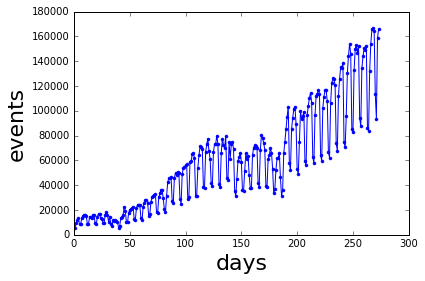

In [19]:
plt.plot(Times, Events, '.-')
plt.xlabel("days", size=22)
plt.ylabel("events", size=22)

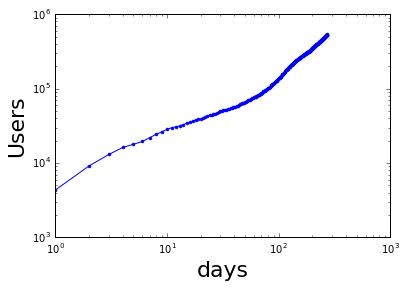

In [20]:
plt.loglog(Times, NUsers, '.-')
plt.xlabel("days", size=22)
plt.ylabel("Users", size=22)